<a href="https://colab.research.google.com/github/Rudraps07/Truck_overloading_detection/blob/master/vehicle_overloading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

In [2]:
#Define Image Shape and Batch Size
IMG_SHAPE = 128
BATCH_SIZE = 64
EPOCHS = 50

In [3]:
#Helper Function to Load the Dataset
def load_dataset():
    X = []
    y = []
    
    # Load normal trucks
    normal_truck_paths = glob.glob('C:/Users/manoj/OneDrive/Desktop/Truck_overloading_detection-master/training_data/normal_trucks/*.jpg')
    print(f"Found {len(normal_truck_paths)} normal truck images.")
    for path in normal_truck_paths:
        try:
            img = tf.keras.preprocessing.image.load_img(path)
            img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img) / 255.0, (IMG_SHAPE, IMG_SHAPE))
            X.append(img)
            y.append([0])
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    
    # Load overloaded trucks
    over_truck_paths = glob.glob('C:/Users/manoj/OneDrive/Desktop/Truck_overloading_detection-master/training_data/over_trucks/*.jpg')
    print(f"Found {len(over_truck_paths)} overloaded truck images.")
    for path in over_truck_paths:
        try:
            img = tf.keras.preprocessing.image.load_img(path)
            img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img) / 255.0, (IMG_SHAPE, IMG_SHAPE))
            X.append(img)
            y.append([1])
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    
    X = np.asarray(X)
    y = np.asarray(y)
    print(f"Loaded {X.shape[0]} images and {y.shape[0]} labels.")
    return X, y

In [4]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import PIL
print(PIL.__version__)

11.0.0


In [6]:
#Load the Dataset
x, y = load_dataset()
print(x.shape, y.shape)

Found 62 normal truck images.
Found 85 overloaded truck images.
Loaded 147 images and 147 labels.
(147, 128, 128, 3) (147, 1)


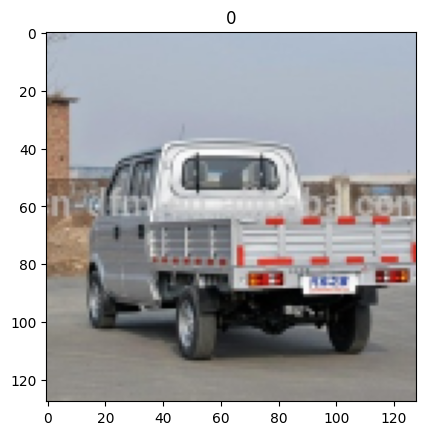

In [7]:
#Sample Image from the Dataset
plt.imshow(x[0])
plt.title(y[0][0])
plt.show()

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Split the dataset into Training and Test Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
X_train.shape, y_train.shape

((117, 128, 128, 3), (117, 1))

In [10]:
#Initialize the Transfer Learning Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

C:\Users\manoj\AppData\Local\Temp\ipykernel_4896\3385126818.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,277,569 (16.32 MB)

 Trainable params: 4,255,681 (16.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [11]:
#Train the model with Training Data
hist = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, validation_batch_size=8, shuffle=True)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5857 - loss: 0.9294 - val_accuracy: 0.7917 - val_loss: 0.8503
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 1.0000 - loss: 0.0381 - val_accuracy: 0.7500 - val_loss: 1.0672
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 604ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.7500 - val_loss: 1.2143
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.7500 - val_loss: 1.2514
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - accuracy: 1.0000 - loss: 3.3190e-04 - val_accuracy: 0.7917 - val_loss: 1.2062
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 590ms/step - accuracy: 1.0000 - loss: 7.8975e-05 - val_accuracy: 0.8333 - val_loss: 1.1614
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 666ms/step - accuracy: 1.0000 - loss: 3.1564e-05 - val_accuracy: 0.8333 - val_loss: 1.1228
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 748ms/step - accuracy: 1.0000 - loss: 1.5117e-05 - val_accuracy: 0.83

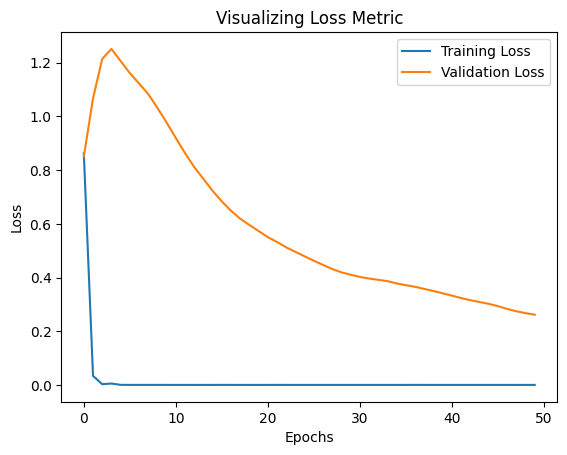

In [12]:
#Visualizing Model Training for Training and Validation Data
plt.plot(range(0, EPOCHS) ,hist.history['loss'], label='Training Loss')
plt.plot(range(0, EPOCHS) ,hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Visualizing Loss Metric')
plt.legend()
plt.show()

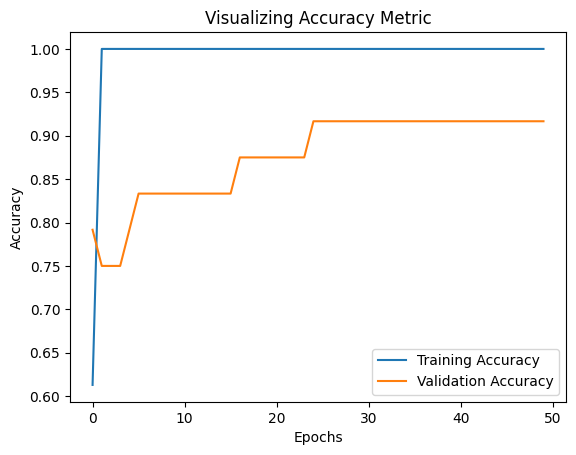

In [13]:
plt.plot(range(0, EPOCHS) ,hist.history['accuracy'], label='Training Accuracy')
plt.plot(range(0, EPOCHS) ,hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing Accuracy Metric')
plt.legend()
plt.show()
#Visualizing Model Training for Training and Validation Data

In [14]:
#evaluate the model on test data
model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 0.8333 - loss: 0.6603


[0.6602528691291809, 0.8333333134651184]

In [15]:
#Helper Function to Prediction
def predict(path):
    img = tf.keras.preprocessing.image.load_img(path)
    img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
    pred = model.predict(np.array([img]))[0]
    plt.imshow(img)
    if (pred >= 0.6):
        plt.title('Overloaded Truck')
    elif (pred > 0.4) and (pred < 0.6):
        plt.title("Not Sure")
    else:
        plt.title("Truck Not Overoaded")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


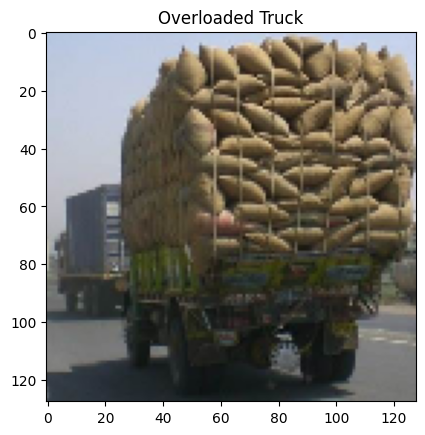

In [16]:
predict('Testing_data/01-OT.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


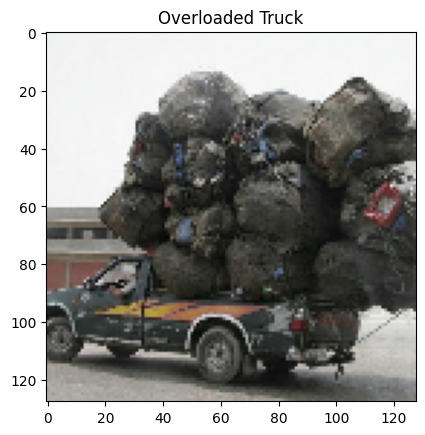

In [17]:
predict('Testing_data/08-OT.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


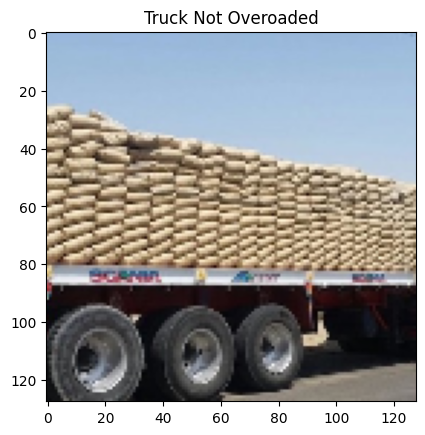

In [18]:
predict('C:/Users/manoj/OneDrive/Desktop/1194751-1511382130.jpg')  

# training photo